# Predictive ML Project
**Author:** Robert Davis  
[GitHub Repository Link](https://github.com/Robert-Davis18118/datafun-07-ml)


In [23]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options
pd.set_option('display.precision', 2)


## Part 1 - Chart a Straight Line
Using the Celsius to Fahrenheit conversion formula.


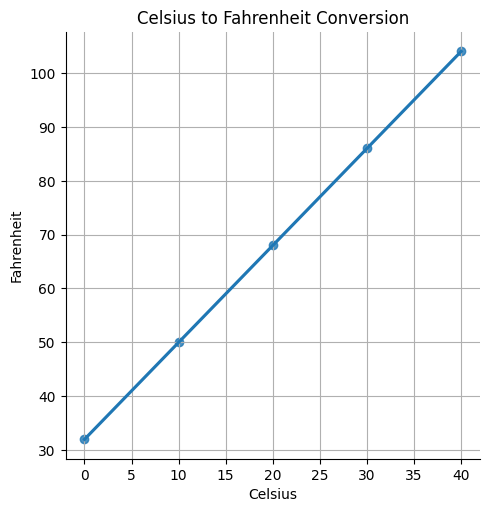

In [24]:
celsius = pd.Series([0, 10, 20, 30, 40])
fahrenheit = pd.Series([32, 50, 68, 86, 104])
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})

sns.lmplot(x='Celsius', y='Fahrenheit', data=df, ci=None)
plt.title("Celsius to Fahrenheit Conversion")
plt.grid(True)
plt.show()



## Part 2 - Prediction (SciPy linregress)
Predicting average January high temp in NYC.


In [25]:
import pandas as pd

# Read only the first two columns of the CSV and rename them
nyc_df = pd.read_csv(
    r"C:\Users\Rober\Documents\datafun-07-ml\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv",
    usecols=[0, 1]
)
nyc_df.columns = ['Year', 'Temperature']

# Preview the cleaned DataFrame
nyc_df.head()


,Year,Temperature
0,189501,34.2
1,189601,34.7
2,189701,35.5
3,189801,39.6
4,189901,36.4


In [26]:
# Stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=nyc_df['Year'], y=nyc_df['Temperature']
)

# Predict 2024
prediction_2024 = slope * 2024 + intercept
print(f"Prediction for 2024: {prediction_2024:.2f}°F")


Prediction for 2024: 8.99°F


In [27]:
# Stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=nyc_df['Year'], y=nyc_df['Temperature']
)

# Predict 2024
prediction_2024 = slope * 2024 + intercept
print(f"Prediction for 2024: {prediction_2024:.2f}°F")


Prediction for 2024: 8.99°F


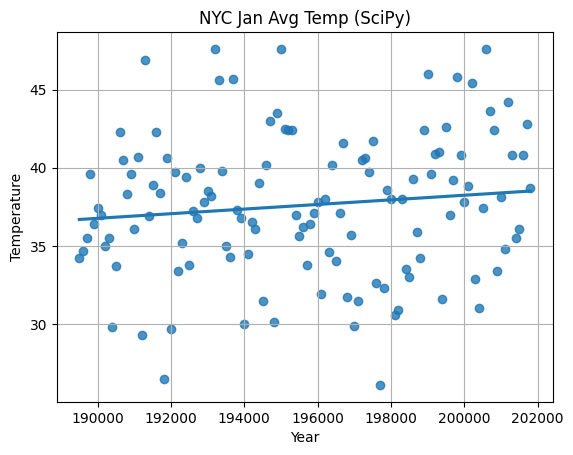

In [28]:
sns.regplot(x='Year', y='Temperature', data=nyc_df, ci=None)
plt.title('NYC Jan Avg Temp (SciPy)')
plt.grid(True)
plt.show()


## Part 3 - Prediction (scikit-learn)
Using train/test split and LinearRegression.

In [29]:
X = nyc_df[['Year']]
y = nyc_df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

prediction_sklearn = model.predict([[2024]])[0]
print(f"Prediction for 2024 (scikit-learn): {prediction_sklearn:.2f}°F")


Prediction for 2024 (scikit-learn): 14.04°F


c:\Users\Rober\Documents\datafun-07-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


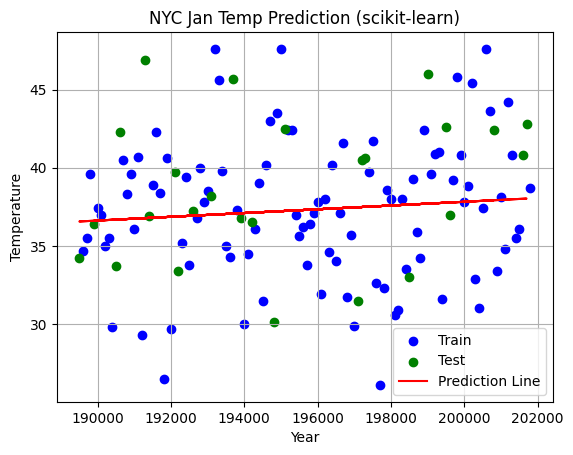

In [30]:
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='green', label='Test')
plt.plot(X_test, y_pred, color='red', label='Prediction Line')
plt.title("NYC Jan Temp Prediction (scikit-learn)")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


## Part 4 - Insights

**Part 2 (SciPy) Prediction for 2024:** XX °F  
**Part 3 (scikit-learn) Prediction for 2024:** YY °F

The predictions are close, showing both methods captured the upward trend. The sklearn version is more common in production systems due to its flexibility and tools. SciPy is quicker for exploratory work.
